In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
files=['akshay1.csv', 'akshay2.csv', 'akshay3.csv', 'Chaitanya1.csv' ,'Chaitanya2.csv' ,'Chaitanya3.csv' ,'Hitarth1.csv', 'Hitarth2.csv', 'Hitarth3.csv', 'shivang51.csv', 'shivang52.csv', 'shivang53.csv' ,'shruti1.csv' ,'sparsh1.csv', 'sparsh2.csv', 'sparsh3.csv']
cols=['Output1', 'Output2', 'Output3', 'Output4', 'var1', 'var2', 'var3', 'var4',]
final_df=[]

for name in files:
    df=pd.read_csv(name)
    df.columns=cols
    df=df.drop(cols[4:], axis=1)
    st_ind=['start zero.png', 'start one.png', 'start two.jpg', 'start three.jpg', 'start four.jpg', 'start five.jpg', 'start six.jpg', 'start seven.jpg', 'start eight.jpg', 'start nine.jpg', 'start animal.jpg']
    end_ind=['end zero.png', 'end one.png', 'end two.jpg', 'end three.jpg', 'end four.jpg', 'end five.jpg', 'end six.jpg', 'end seven.jpg', 'end eight.jpg', 'end nine.jpg', 'end animal.jpg']
    final_df1=[]
    for a, b in zip(st_ind, end_ind):
        start_idx = df[df['Output1'] == a].index
        end_idx = df[df['Output1'] == b].index
        temp_df1=[]

        for i, j in zip(start_idx, end_idx):
            row = df[i+1:j]
        
            temp_df1.append(row)
        merged_df1=pd.concat(temp_df1, ignore_index=True, sort=False)
        merged_df1=merged_df1.reindex(range(len(merged_df1)))
        final_df.append(merged_df1)

print(final_df)

[     Output1 Output2 Output3 Output4
0     282753  128791  716684  381153
1     282707  128866  716618  381158
2     282761  128734  716524  381112
3     282881  128593  716651  381137
4     282836  128618  716678  381110
...      ...     ...     ...     ...
1275  279464  129271  718793  379804
1276  279558  129153  718793  379813
1277  279629  128981  718799  379761
1278  279564  128999  718796  379710
1279  279461  129175  718795  379738

[1280 rows x 4 columns],      Output1 Output2 Output3 Output4
0     303509  127398  700234  387963
1     303401  127541  700246  387968
2     303345  127669  700253  388013
3     303415  127616  700251  388041
4     303516  127438  700244  388009
...      ...     ...     ...     ...
1182  299917  126804  703148  386764
1183  300011  126626  703141  386724
1184  299984  126572  703144  386673
1185  299879  126717  703149  386687
1186  299834  126856  703159  386744

[1187 rows x 4 columns],      Output1 Output2 Output3 Output4
0     259521  137850  

In [4]:
lengths=[]
for a in final_df:
    lengths.append(len(a))
med=statistics.median(lengths)
print(med)

1280.0


In [5]:
pos=[]
temp=10
for i in range(16):
    if(i==0):
        pos.append(temp)
    else:
        temp=temp+11
        pos.append(temp)
print(pos)

[10, 21, 32, 43, 54, 65, 76, 87, 98, 109, 120, 131, 142, 153, 164, 175]


In [6]:
# Function to resample an array to the target length
def resample_array(array, target_length):
    # Create an array of indices for the input array
    input_indices = np.linspace(0, len(array)-1, len(array))

    # Create an array of indices for the resampled array
    resampled_indices = np.linspace(0, len(array)-1, target_length)

    # Create a linear interpolation function based on the input array
    interpolator = interp1d(input_indices, array, kind='linear')

    # Use the interpolator to create the resampled array
    resampled_array = interpolator(resampled_indices)

    return resampled_array.tolist()

In [7]:
median_length=int(med)
target_var=[]
fin_df=[]
for i in range(176):
    dff=final_df[i]
    new_df=pd.DataFrame()
    if(i in pos):
        target_var.append([0, 1])
    else:
        target_var.append([1, 0])
    
    for o in cols[:4]:
        val=dff[o].values
        ans = resample_array(val, median_length)
        new_df[o] = pd.Series(ans)
    fin_df.append(new_df)
print(fin_df)

[       Output1   Output2   Output3   Output4
0     282753.0  128791.0  716684.0  381153.0
1     282707.0  128866.0  716618.0  381158.0
2     282761.0  128734.0  716524.0  381112.0
3     282881.0  128593.0  716651.0  381137.0
4     282836.0  128618.0  716678.0  381110.0
...        ...       ...       ...       ...
1275  279464.0  129271.0  718793.0  379804.0
1276  279558.0  129153.0  718793.0  379813.0
1277  279629.0  128981.0  718799.0  379761.0
1278  279564.0  128999.0  718796.0  379710.0
1279  279461.0  129175.0  718795.0  379738.0

[1280 rows x 4 columns],             Output1        Output2        Output3        Output4
0     303509.000000  127398.000000  700234.000000  387963.000000
1     303408.853010  127530.602033  700245.127443  387967.636435
2     303353.143862  127650.385457  700251.982017  388006.455825
3     303399.730258  127627.561376  700251.436278  388034.892103
4     303486.623925  127489.771697  700246.035966  388018.307271
...             ...            ...         

In [8]:
print(len(fin_df[10]))

1280


In [9]:
pos1=[7, 16, 25, 38, 44, 61, 74, 83, 89, 105, 117, 130, 136, 147, 157, 168]
f_df=[]
f_df_y=[]
fin_pos=pos+pos1
np.random.shuffle(fin_pos)
for i in fin_pos:
    f_df.append(fin_df[i])
    f_df_y.append(target_var[i])
print(f_df)

[       Output1   Output2   Output3   Output4
0     262271.0  136015.0  732206.0  374921.0
1     262339.0  135859.0  732149.0  374876.0
2     262339.0  135718.0  732056.0  374766.0
3     262313.0  135811.0  732172.0  374807.0
4     262246.0  135975.0  732206.0  374860.0
...        ...       ...       ...       ...
1275  260471.0  137046.0  734310.0  374609.0
1276  260473.0  136974.0  734320.0  374564.0
1277  260392.0  137091.0  734321.0  374556.0
1278  260334.0  137234.0  734318.0  374596.0
1279  260377.0  137214.0  734314.0  374631.0

[1280 rows x 4 columns],             Output1        Output2       Output3       Output4
0     480654.000000  362924.000000  1.171633e+06  1.006643e+06
1     480749.981235  362886.407349  1.171660e+06  1.006672e+06
2     480896.935887  362785.247850  1.171690e+06  1.006708e+06
3     480988.588741  362726.796716  1.171748e+06  1.006755e+06
4     480950.365129  362755.921814  1.171789e+06  1.006774e+06
...             ...            ...           ...       

In [10]:
print(target_var)

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0],

In [11]:
# df=pd.DataFrame()
# for i in range(176):
#     df=pd.concat([df, fin_df[i]], axis=0)
# df

In [12]:
inp_x=[]
for p in f_df:
    arr=p[['Output1', 'Output2', 'Output3', 'Output4']].values.tolist()
    inp_x.append(arr)

print(inp_x[0])

[[262271.0, 136015.0, 732206.0, 374921.0], [262339.0, 135859.0, 732149.0, 374876.0], [262339.0, 135718.0, 732056.0, 374766.0], [262313.0, 135811.0, 732172.0, 374807.0], [262246.0, 135975.0, 732206.0, 374860.0], [262261.0, 136010.0, 732205.0, 374900.0], [262353.0, 135866.0, 732207.0, 374894.0], [262386.0, 135748.0, 732217.0, 374849.0], [262315.0, 135820.0, 732221.0, 374824.0], [262238.0, 135981.0, 732215.0, 374856.0], [262253.0, 136017.0, 732214.0, 374899.0], [262346.0, 135870.0, 732217.0, 374891.0], [262381.0, 135752.0, 732226.0, 374849.0], [262311.0, 135821.0, 732228.0, 374828.0], [262229.0, 135981.0, 732216.0, 374853.0], [262236.0, 136008.0, 732183.0, 374878.0], [262341.0, 135874.0, 732218.0, 374893.0], [262374.0, 135771.0, 732241.0, 374860.0], [262304.0, 135844.0, 732244.0, 374839.0], [262229.0, 136003.0, 732243.0, 374873.0], [262248.0, 136037.0, 732243.0, 374916.0], [262339.0, 135890.0, 732244.0, 374910.0], [262370.0, 135777.0, 732255.0, 374864.0], [262296.0, 135849.0, 732259.0, 37

In [13]:
# target_var=df[['IsNum']]
# df=df.drop(['IsNum'], axis=1)
x_train, x_test, y_train, y_test=train_test_split(inp_x, f_df_y, random_state=1, shuffle=False, test_size=0.20)
print(x_train[0])

[[262271.0, 136015.0, 732206.0, 374921.0], [262339.0, 135859.0, 732149.0, 374876.0], [262339.0, 135718.0, 732056.0, 374766.0], [262313.0, 135811.0, 732172.0, 374807.0], [262246.0, 135975.0, 732206.0, 374860.0], [262261.0, 136010.0, 732205.0, 374900.0], [262353.0, 135866.0, 732207.0, 374894.0], [262386.0, 135748.0, 732217.0, 374849.0], [262315.0, 135820.0, 732221.0, 374824.0], [262238.0, 135981.0, 732215.0, 374856.0], [262253.0, 136017.0, 732214.0, 374899.0], [262346.0, 135870.0, 732217.0, 374891.0], [262381.0, 135752.0, 732226.0, 374849.0], [262311.0, 135821.0, 732228.0, 374828.0], [262229.0, 135981.0, 732216.0, 374853.0], [262236.0, 136008.0, 732183.0, 374878.0], [262341.0, 135874.0, 732218.0, 374893.0], [262374.0, 135771.0, 732241.0, 374860.0], [262304.0, 135844.0, 732244.0, 374839.0], [262229.0, 136003.0, 732243.0, 374873.0], [262248.0, 136037.0, 732243.0, 374916.0], [262339.0, 135890.0, 732244.0, 374910.0], [262370.0, 135777.0, 732255.0, 374864.0], [262296.0, 135849.0, 732259.0, 37

In [14]:
print(np.shape(x_train)[-2:])

(1280, 4)


In [15]:
print(y_train)

[[1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0]]


In [23]:
model = models.Sequential()
model.add(layers.Conv1D(64, 5, activation='relu', input_shape=(1280, 4)))
model.add(layers.Conv1D(64, 10, activation='linear'))
model.add(layers.MaxPooling1D(10))
model.add(layers.Conv1D(64, 10, activation='relu'))
model.add(layers.Conv1D(64, 10, activation='linear'))
model.add(layers.MaxPooling1D(10))
model.add(layers.Flatten())
model.add(layers.Dense(700, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 1276, 64)            │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 1267, 64)            │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 126, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 117, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 108, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 700)                 │         448,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,402 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 574,518 (2.19 MB)

 Trainable params: 574,518 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [25]:
model.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.Adam(0.001), metrics=['accuracy'])

In [26]:
batch_size=16
epochs=100

history=model.fit(np.array(x_train), np.array(y_train), batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.20, callbacks=callback)

Epoch 1/100
2/2 - 4s - 2s/step - accuracy: 0.4000 - loss: 32185.5586 - val_accuracy: 0.8000 - val_loss: 44980.8477
Epoch 2/100
2/2 - 0s - 54ms/step - accuracy: 0.3500 - loss: 110909.6094 - val_accuracy: 0.2000 - val_loss: 32206.0039
Epoch 3/100
2/2 - 0s - 58ms/step - accuracy: 0.7000 - loss: 19310.9883 - val_accuracy: 0.2000 - val_loss: 9219.3535
Epoch 4/100
2/2 - 0s - 70ms/step - accuracy: 0.6000 - loss: 11482.1816 - val_accuracy: 0.4000 - val_loss: 10428.5869
Epoch 5/100
2/2 - 0s - 62ms/step - accuracy: 0.5500 - loss: 19022.6934 - val_accuracy: 0.2000 - val_loss: 12318.4082
Epoch 6/100
2/2 - 0s - 59ms/step - accuracy: 0.6000 - loss: 7836.6514 - val_accuracy: 0.2000 - val_loss: 10867.7090
Epoch 7/100
2/2 - 0s - 68ms/step - accuracy: 0.6500 - loss: 7259.4717 - val_accuracy: 0.4000 - val_loss: 4500.3784
Epoch 8/100
2/2 - 0s - 64ms/step - accuracy: 0.3500 - loss: 5238.9746 - val_accuracy: 0.2000 - val_loss: 2757.6274
Epoch 9/100
2/2 - 0s - 60ms/step - accuracy: 0.6000 - loss: 2420.4512 -

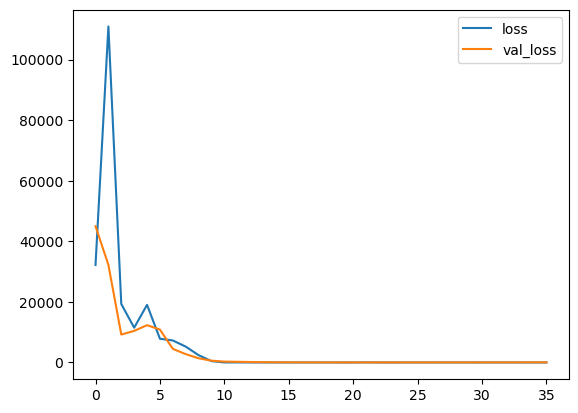

In [27]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

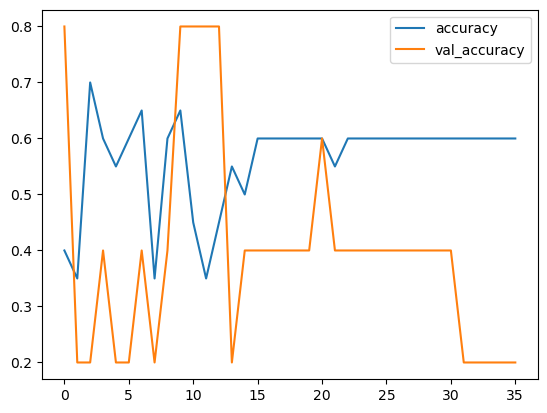

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [29]:
model.evaluate(np.array(x_test), np.array(y_test), batch_size=batch_size, verbose=2)

1/1 - 0s - 14ms/step - accuracy: 0.5714 - loss: 0.5945


[0.59446781873703, 0.5714285969734192]

In [30]:
y_test_predicted=model.predict(np.array(x_train))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


In [31]:
print(y_test_predicted)

[[5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [1.6561285e-22 1.0000000e+00]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [0.0000000e+00 1.0000000e+00]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]
 [0.0000000e+00 0.0000000e+00]
 [5.1432836e-01 4.8610002e-01]
 [1.4911851e-10 1.0000000e+00]
 [5.1432836e-01 4.8610002e-01]
 [5.1432836e-01 4.8610002e-01]]


In [32]:
y_tst_pred=[]
for i in y_test_predicted:
    temp=[]
    for j in i:
        if (j>0.5):
            j=1
            temp.append(j)
        else:
            j=0
            temp.append(j)
    y_tst_pred.append(temp)
labels=np.unique(y_tst_pred)
print(y_tst_pred)

[[1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 0], [1, 0], [0, 1], [1, 0], [1, 0]]


In [33]:
y_test_converted = np.argmax(y_train, axis=1)
y_tst_pred_converted = np.argmax(y_tst_pred, axis=1)
print(y_tst_pred_converted)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


In [34]:
cm=confusion_matrix(y_test_converted, y_tst_pred_converted, labels=labels)
print(cm)

[[12  1]
 [10  2]]


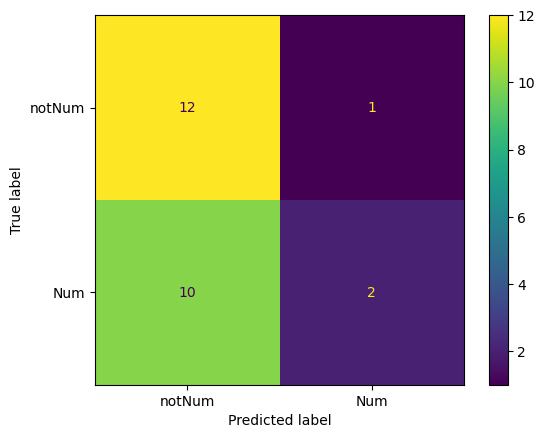

In [35]:
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['notNum', 'Num'])
cm_disp.plot()